<a href="https://colab.research.google.com/github/Arpita5188/CBT-CIP/blob/main/image_classification_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.3345 - loss: 1.7860 - val_accuracy: 0.5197 - val_loss: 1.3197
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.5540 - loss: 1.2473 - val_accuracy: 0.5852 - val_loss: 1.1710
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - accuracy: 0.6206 - loss: 1.0788 - val_accuracy: 0.6254 - val_loss: 1.0544
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.6596 - loss: 0.9661 - val_accuracy: 0.6634 - val_loss: 0.9536
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 88ms/step - accuracy: 0.6826 - loss: 0.9073 - val_accuracy: 0.6817 - val_loss: 0.9188
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.7083 - loss: 0.8274 - val_accuracy: 0.6764 - val_loss: 0.9241
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.7302 - loss: 0.7722 - val_accuracy: 0.7017 - val_loss: 0.8761
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.7384 - loss: 0.7430 - 

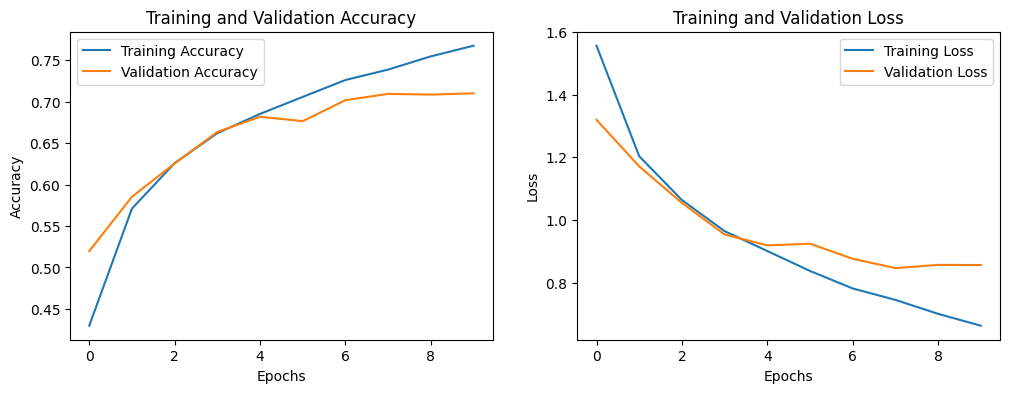

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
